## - 불러올 패키지 목록

In [1]:
# 파이썬 기본 패키지
import math  # 수학 함수 패키지
import itertools  # Functions creating iterators for efficient looping
from collections import Counter  # label별 데이터 카운트를 위한 모듈

# 데이터 핸들링을 위한 패키지
import numpy as np
import pandas as pd

# missingno 패키지 (데이터 전처리 전 결측치 확인)
import missingno as msno

# 전처리 및 모델 성능평가 관련 패키지
from sklearn.preprocessing import *  # 데이터 전처리를 위한 패키지
from sklearn.model_selection import *  # 데이터 분리, 검증 및 파라미터 튜닝을 위한 패키지
from sklearn.metrics import *  # 모델에 대한 다양한 성능 평가를 위한 패키지

# 시각화를 위한 패키지
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.cm as cm  # 내장 colormap, colormap 처리 유틸리티
from matplotlib.colors import ListedColormap  # colors and colormaps
%matplotlib inline
# %matplotlib inline 의 목적은 plt.show()함수가 호출되지 않은 경우에도 matplotlib 다이어그램을 렌더링하는 것이다.
# 그러나 현재 업데이트된 버전의 주피터 노트북 버전에서는 %matplotlib inline 를 사용하지 않더라도 Matplotlib 다이어그램을 개체로 표현한다.
# 따라서 굳이 필요하지는 않다. 그러나 코드를 깨끗하게 유지하고 자신이 만든 플롯을 호출하기 위해 여전히 관례적으로 권장된다.

# 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

# 그래프 스타일 서식 지정
plt.style.use('default')

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

# 그래프 축의 음수 표현 오류 방지
plt.rcParams['axes.unicode_minus'] = False
#
####################################################################################

# pingouin 패키지 (통계분석 관련)
import pingouin as pg

# SciPy 패키지
import scipy
import scipy.stats as stats  # 통계 분석을 위한 패키지
from scipy.cluster.hierarchy import *  # 계층적 군집 분석을 위한 패키지
from scipy.stats import randint, uniform  # 균일한 이산 확률 변수 및 연속 확률 변수

# statsmodels 패키지
from statsmodels.api import *
from statsmodels.formula.api import *
from statsmodels.stats.api import *
from statsmodels.stats.proportion import *
from statsmodels.stats.diagnostic import *
from statsmodels.stats.weightstats import *

# 시계열 관련 statsmodels 패키지
from statsmodels.tsa.api import *
from statsmodels.tsa.ar_model import *
from statsmodels.tsa.arima.model import *
from statsmodels.tsa.arima_process import *
from statsmodels.tsa.statespace import *
from statsmodels.graphics.api import *
from statsmodels.graphics.tsaplots import *
#
####################################################################################

## 이론 및 코드 작성에 참고한 출처

- 기초이론 강의 (김성범 교수)
  - https://www.youtube.com/playlist?list=PLpIPLT0Pf7IqSuMx237SHRdLd5ZA4AQwd


- ARIMA 실습 (이지윤 조교)
  - https://www.youtube.com/watch?v=rdR2fNDq6v0&list=PLpIPLT0Pf7IqSuMx237SHRdLd5ZA4AQwd&index=11&t=216s

## 데이터 정보

- https://dacon.io/competitions/official/235837/overview/description

- bicycle_train.csv : 학습 데이터
  - date_time : 일별 날짜
  - wind_direction: 풍향 (degree)
  - sky_condition : 하늘 상태 (하단 설명 참조)
  - precipitation_form : 강수 형태 (하단 설명 참조)
  - wind_speed : 풍속 (m/s)
  - humidity : 습도 (%)
  - low_temp : 최저 기온 ( `C)
  - high_temp : 최고 기온 ( `C)
  - Precipitation_Probability : 강수 확률 (%)
  - number_of_rentals : 따릉이 대여량


- bicycle_test.csv : 테스트 데이터
  - date_time : 일별 날짜
  - wind_direction: 풍향
  - sky_condition : 하늘 상태
  - precipitation_form : 강수 형태
  - wind_speed : 풍속
  - humidity : 습도
  - low_temp : 최저 기온
  - high_temp : 최고 기온
  - Precipitation_Probability : 강수 확률


- sample_submissoin.csv : 제출 양식
  - date_time : 일별 날짜
  - number_of_rentals : 따릉이 대여량


- 데이터 상세 설명
  - 기상 데이터는 하루에 총 8번 3시간 간격으로 발표되는 기상단기예보(SHRT) 데이터를 1일 평균으로 변환한 데이터입니다.
  - sky_condition (하늘 상태) 코드 : 맑음(1), 구름많음(3), 흐림(4)
  - precipitation_form (강수 형태) 코드 : 없음(0), 비(1), 진눈깨비(2), 눈(3), 소나기(4)
  - 위 데이터는 4월~6월의 기상 데이터만을 추출한 것이기 때문에 없음(0), 비(1)만 등장했습니다.
  - 따라서 precipitation_form 이 0.5인 경우: "하루의 절반은 비가 올 것으로 예측하고, 나머지 절반은 맑을 것으로 예측했다"는 의미로 해석해주시기 바랍니다.


  - 위 자료는 아래 공공 데이터를 바탕으로 제작되었습니다.

  - [기상청] 기상자료개방포털
  - [서울특별시] 서울 열린데이터 광장

# 데이터프레임 생성 및 전처리

## 데이터프레임 생성 및 데이터 정보 확인

In [2]:
df = pd.read_csv('dacon_bicycle_train.csv')
df

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals
0,2018-04-01,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994
1,2018-04-02,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139
2,2018-04-03,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817
3,2018-04-04,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034
4,2018-04-05,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833
...,...,...,...,...,...,...,...,...,...,...
268,2020-06-26,228.662,3.980,0.223,2.271,78.378,20.500,27.526,36.486,96150
269,2020-06-27,207.770,2.865,0.081,1.794,78.412,20.812,28.842,21.081,107001
270,2020-06-28,282.568,1.730,0.000,1.820,72.736,21.000,29.053,7.297,98568
271,2020-06-29,137.027,2.257,0.088,2.043,70.473,19.625,26.000,15.541,70053


In [3]:
problem = pd.read_csv('dacon_bicycle_test.csv')
problem

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability
0,2021-04-01,108.833,3.000,0.000,2.900,28.333,11.800,20.667,18.333
1,2021-04-02,116.717,3.850,0.000,2.662,46.417,12.000,19.000,28.500
2,2021-04-03,82.669,4.000,0.565,2.165,77.258,8.875,16.368,52.847
3,2021-04-04,44.123,3.466,0.466,3.747,63.288,6.250,17.368,37.671
4,2021-04-05,147.791,1.500,0.000,1.560,48.176,7.188,18.684,4.459
...,...,...,...,...,...,...,...,...,...
86,2021-06-26,177.149,3.980,0.223,1.066,74.628,20.312,28.579,36.486
87,2021-06-27,138.723,2.777,0.135,1.290,70.236,20.812,29.000,18.378
88,2021-06-28,111.095,3.338,1.270,1.692,70.338,21.000,28.789,35.946
89,2021-06-29,171.622,3.270,0.595,1.470,70.473,21.000,29.421,27.770


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date_time                  273 non-null    object 
 1   wind_direction             273 non-null    float64
 2   sky_condition              273 non-null    float64
 3   precipitation_form         273 non-null    float64
 4   wind_speed                 273 non-null    float64
 5   humidity                   273 non-null    float64
 6   low_temp                   273 non-null    float64
 7   high_temp                  273 non-null    float64
 8   Precipitation_Probability  273 non-null    float64
 9   number_of_rentals          273 non-null    int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 21.5+ KB


## 날짜 데이터 전처리

In [5]:
# object 타입인 날짜 데이터를 datetime64 타입으로 변환 
df.date_time = pd.to_datetime( df.date_time )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date_time                  273 non-null    datetime64[ns]
 1   wind_direction             273 non-null    float64       
 2   sky_condition              273 non-null    float64       
 3   precipitation_form         273 non-null    float64       
 4   wind_speed                 273 non-null    float64       
 5   humidity                   273 non-null    float64       
 6   low_temp                   273 non-null    float64       
 7   high_temp                  273 non-null    float64       
 8   Precipitation_Probability  273 non-null    float64       
 9   number_of_rentals          273 non-null    int64         
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 21.5 KB


In [6]:
# 연도와 월을 추출하여 별도의 컬럼 추가
df['year'] = df.date_time.apply( lambda x : x.year )
df['month'] = df.date_time.apply( lambda x : x.month )

In [7]:
df.groupby( ['year', 'month'] ).count()

date_time  wind_direction  sky_condition  precipitation_form  \
year month                                                                 
2018 4             30              30             30                  30   
     5             31              31             31                  31   
     6             30              30             30                  30   
2019 4             30              30             30                  30   
     5             31              31             31                  31   
     6             30              30             30                  30   
2020 4             30              30             30                  30   
     5             31              31             31                  31   
     6             30              30             30                  30   

            wind_speed  humidity  low_temp  high_temp  \
year month                                              
2018 4              30        30        30         30   
     5              31        31        31         31   
     6              30        30        30         30   
2019 4              30        30        30         30   
     5              31        31        31         31   
     6              30        30        30         30   
2020 4              30        30        30         30   
     5              31        31        31         31   
     6              30        30        30         30   

            Precipitation_Probability  number_of_rentals  
year month                                                
2018 4                             30                 30  
     5                             31                 31  
     6                             30                 30  
2019 4                             30                 30  
     5                             31                 31  
     6                             30                 30  
2020 4                             30                 30  
     5                             31                 31  
     6                             30                 30

In [8]:
data = df.iloc[:, [0, 9] ]
data = data.set_index('date_time')
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 273 entries, 2018-04-01 to 2020-06-30
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   number_of_rentals  273 non-null    int64
dtypes: int64(1)
memory usage: 4.3 KB


In [9]:
data = df.iloc[:, 9]
data

0       22994
1       28139
2       26817
3       26034
4        2833
        ...  
268     96150
269    107001
270     98568
271     70053
272     38086
Name: number_of_rentals, Length: 273, dtype: int64

# 시계열 데이터 확인

## 그래프 개형 확인

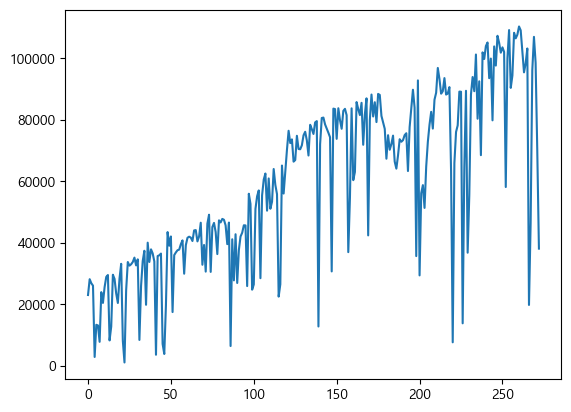

In [10]:
fig = data.plot()

## Seasonal Variation 확인 및 데이터 변환

1. constant Seasonal Variation : Seasonal Variation 의 폭이 시간에 따라 일정한 경우
2. Increasing Seasonal Variation : Seasonal Variation 의 폭이 시간에 따라 점점 증가하는 경우

- 데이터가 'Increasing Seasonal Variations' 형태를 띠고 있을 경우에는 모델로 다루기가 어렵다.
- 따라서 'constant Seasonal Variations' 과 비슷한 형태로 만들기 위해 제곱근을 취하거나 자연로그를 취한다.

### Log Transform

## 시계열 분해

- `statsmodels.tsa.seasonal.seasonal_decompose( x, model='additive', filt=None, period=None, two_sided=True, extrapolate_trend=0 )`
  - https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html
  - model :
    - 'additive' : Trend, Seasonal, Resid 가 더해져서 해당 값을 구성한다고 가정
    - 'multiplicative' : Trend, Seasonal, Resid 가 곱해져서 해당 값을 구성한다고 가정
  - fit : 
  - period : 
  - two_sided : 
  - extrapolate_trend : 

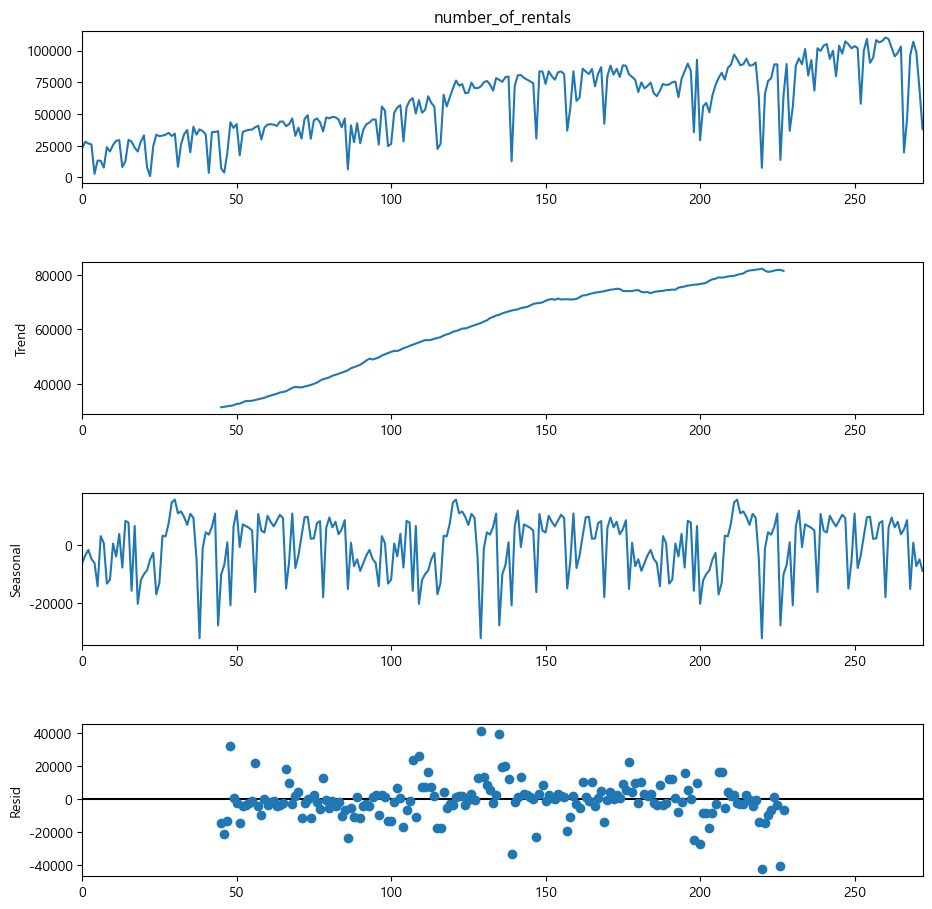

In [11]:
decomposition = seasonal_decompose( data,
                                    period = 91 )

fig = decomposition.plot()
fig.set_size_inches(10,10)
plt.show()

## 자기상관성 확인

- Autocoreelation(자기상관성)
  - 현 시점 데이터와 d 시점 이전 데이터와의 상관관계 
  - 즉, $x_t$ 와 $x_{t-1}$ 간의 상관관계
  - 일반적인 회귀분석과 마찬가지로 시계열 회귀분석도 오차의 정규성 및 독립성을 만족해야 한다.
  - 시계열 분석에서의 '오차의 독립성 유/무'에 해당하는 것이 '자기상관성' 이다.
  - 하지만 이전 시점의 데이터에 영향을 받는 시계열 데이터의 특성 상 오차 간의 독립성이 위배될 가능성, 즉, 자기상관성이 존재할 가능성이 크다.


- 자기상관성 유/무 판단으로 시계열 자료의 정상성도 간접적으로 확인할 수 있다.
  - 잔차들이 자기상관성이 없다면 원 데이터가 정상성을 만족하는 것이다.


- 차분 데이터의 ACF 및 PACF 의 그래프 개형으로 시계열 모형의 Parameter를 예상할 수 있다.
  - 그러나 대부분의 실제 시계열 데이터의 경우, 그래프 개형으로 판단하기가 애매한 경우가 많아서 파라미터 범위를 지정하여 반복연산을 돌려 시계열 모형의 p,d,q 값을 산출하는 경우가 많다. 

### ACF 및 PACF 확인

- `statsmodels.graphics.tsaplots.plot_acf( x, ax=None, lags=None, *, alpha=0.05, use_vlines=True, adjusted=False, fft=False, missing='none', title='Autocorrelation', zero=True, auto_ylims=False, bartlett_confint=True, vlines_kwargs=None, **kwargs )`
  - https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_acf.html



- `statsmodels.graphics.tsaplots.plot_pacf( x, ax=None, lags=None, alpha=0.05, method=None, use_vlines=True, title='Partial Autocorrelation', zero=True, vlines_kwargs=None, **kwargs )`
  - https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_pacf.html

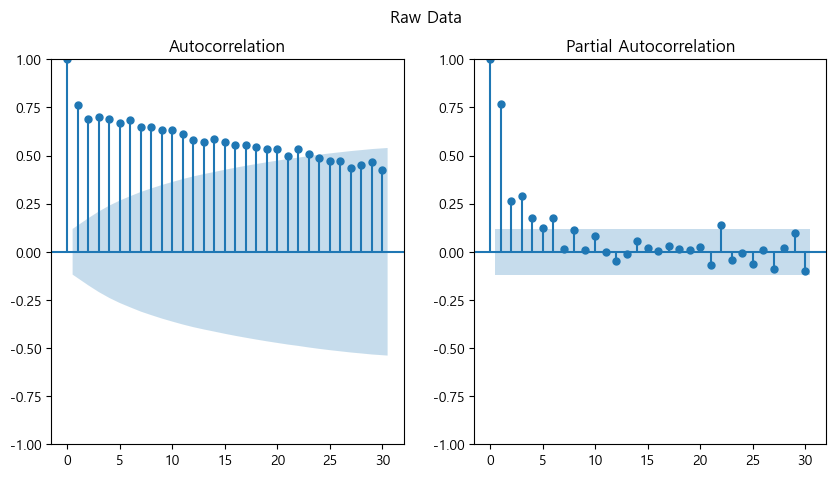

In [12]:
fig, ax = plt.subplots( 1, 2, figsize = (10,5))
fig.suptitle('Raw Data')

plot_acf( data, lags = 30, ax=ax[0] )
plot_pacf( data, lags = 30, ax=ax[1] );

## 정상성 확인

- Stationary Process
  1. 시간에 관계없이 평균과 분산이 일정하다.
  2. 공분산이 '시차'에만 의존하고 '특정 시점'에는 의존하지 않는다.  
     (즉, 't 시점과 t-1 시점의 공분산'과 't 시점과 t+1 시점의 공분산'이 같다.)


- 정상성 확인 방법
  - 자기상관함수(ACF; Autocorrelation Function)의 패턴을 이용하여 판단한다.
    - ACF plot 이 특정한 패턴없이 랜덤한 경향을 띠면 정상성을 만족하는 것으로 본다.
  - ADF(Augmented Dicky Fuller) 검정을 수행한다.

### ADF(Augmented Dicky Fuller) 검정

- https://hongl.tistory.com/98


- 정상성을 알아보기 위한 단위근 검정 방법.
  - 단위근은 시계열 자료에서 예측할 수 없는 결과를 초래할 수 있음.
  - ADF 검정은 자기상관(serial correlation)과 함께 사용할 수 있다.
  - ADF 검정은 Dickey-Fuller 검정보다 더 복잡한 모형들을 다룰 수 있으며, 더 강력하기도 하다.
  - 제1종 오류율이 다소 높은 편이므로 이 검정을 사용할 때는 다른 단위근 검정과 마찬가지로 주의를 요한다.


- 검정에 사용하는 가설
  - 귀무가설(H0) : 자료에 단위근이 존재한다. (시계열이 정상성을 만족하지 않는다.)
  - 대립가설(H1) : 시계열 자료가 정상성을 만족한다. (또는 추세 정상성을 만족한다).
    - ※ 대립가설은 어떤 방정식을 사용하느냐에 따라 조금씩 다르다.


- `statsmodels.tsa.stattools.adfuller( x, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False )`
  - https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.adfuller.html
  - Parameters : 
    - maxlag :
      - Maximum lag(차분 차수의 최대값)을 지정. None 이면 12*(nobs/100)^{1/4} 으로 계산.
      - 'autolag' 파라미터가 None 으로 설정되어 있어야 적용됨.
    - regression : 
      - 'c' : default. 추세는 없고 상수항만 존재한다고 가정.
      - 'ct' : 상수항과 추세가 둘 다 존재한다고 가정.
      - 'ctt' : 상수항, 일차 추세, 이차 추세가 모두 존재한다고 가정.
      - 'n' : 상수항과 추세가 둘 다 없다고 가정.
    - autolag : lag(차분 차수)를 자동으로 지정
      - 'AIC' : 기본값. AIC를 최소화 하는 값을 자동으로 설정.
      - 'BIC' : 기본값. BIC를 최소화 하는 값을 자동으로 설정.
      - 't-stat' : maxlag 에서 지정한 값부터 lag를 줄여가며 regression을 수행하여, p-value가 0.05 미만이 될 때의 lag 값을 지정한다.
      - None : 'maxlag' 파라미터에서 지정한 값이 설정됨.    
  - Returns : 
    - `adf` : 검정 통계량
    - `pvalue` : MacKinnon’s approximate p-value based on MacKinnon (1994, 2010).
    - `usedlag` : The number of lags used.
    - `nobs` : ADF 회귀 및 임계값 계산에 사용된 관측치의 수.
    - `critical values` : 유의수준(1%, 5%, 10%)에서의 검정 통계량에 대한 임계값.
    - `icbest` : The maximized information criterion if autolag is not None.
    - `resstore` : A dummy class with results attached as attributes.

In [13]:
adf_result = adfuller( data )

print( 'ADF 검정통계량 : %.4f'  % adf_result[0] )
print( 'p-value : %.4f'  % adf_result[1] )
print( 'used lag :', adf_result[2] )
print( 'critical values :', adf_result[4] )

ADF 검정통계량 : -2.0579
p-value : 0.2618
used lag : 7
critical values : {'1%': -3.4552699038400827, '5%': -2.8725092359464526, '10%': -2.5726152830188678}


# 차분(Differencing)

- 시계열 데이터의 정상성(stationary)을 확보하기 위한 작업
  - 현 시점 데이터에서 d 시점 이전 데이터를 뺀 것.
  - 1차 차분 : $y_t = x_t - x_{t-1}$ 
  - 2차 차분 : $y_t = x_t - x_{t-2}$
  - x 가 'non-stationary' 일지라도, 그것을 차분한 y 는 'stationay' 일 가능성이 크다.


- Stationary Process
  - 시간에 관계없이 평균과 분산이 일정한 시계열 데이터.
  - 공분산이 '시차'에만 의존하고 '특정 시점'에는 의존하지 않는다.
    - 즉, 't 시점과 t-1 시점의 공분산'과 't 시점과 t+1 시점의 공분산'이 같다.
  - 자기상관함수(ACF; Autocorrelation Function)의 패턴을 이용하여 판단한다.
  - ACF plot 이 특정한 패턴없이 랜덤한 경향을 띠면 정상성을 만족하는 것으로 본다.


- `pandas.Series.diff(periods=1)`  
https://pandas.pydata.org/docs/reference/api/pandas.Series.diff.html

- `pandas.DataFrame.diff( periods=1, axis=0 )`  
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.diff.html

## 1차 차분

In [14]:
diff_data = data.copy()

# 1차 차분
diff_data = diff_data.diff( periods = 1 )
diff_data

0          NaN
1       5145.0
2      -1322.0
3       -783.0
4     -23201.0
        ...   
268    49735.0
269    10851.0
270    -8433.0
271   -28515.0
272   -31967.0
Name: number_of_rentals, Length: 273, dtype: float64

In [15]:
# 결측치 확인
diff_data.isnull().groupby( diff_data.isnull() == True ).count()

number_of_rentals
False    272
True       1
Name: number_of_rentals, dtype: int64

In [16]:
# 결측치 제거
diff_data = diff_data.dropna()

print('< RAW DATA >' )
print(data)
print()
print('< Differenced DATA >' )
print(diff_data)

< RAW DATA >
0       22994
1       28139
2       26817
3       26034
4        2833
        ...  
268     96150
269    107001
270     98568
271     70053
272     38086
Name: number_of_rentals, Length: 273, dtype: int64

< Differenced DATA >
1       5145.0
2      -1322.0
3       -783.0
4     -23201.0
5      10464.0
        ...   
268    49735.0
269    10851.0
270    -8433.0
271   -28515.0
272   -31967.0
Name: number_of_rentals, Length: 272, dtype: float64


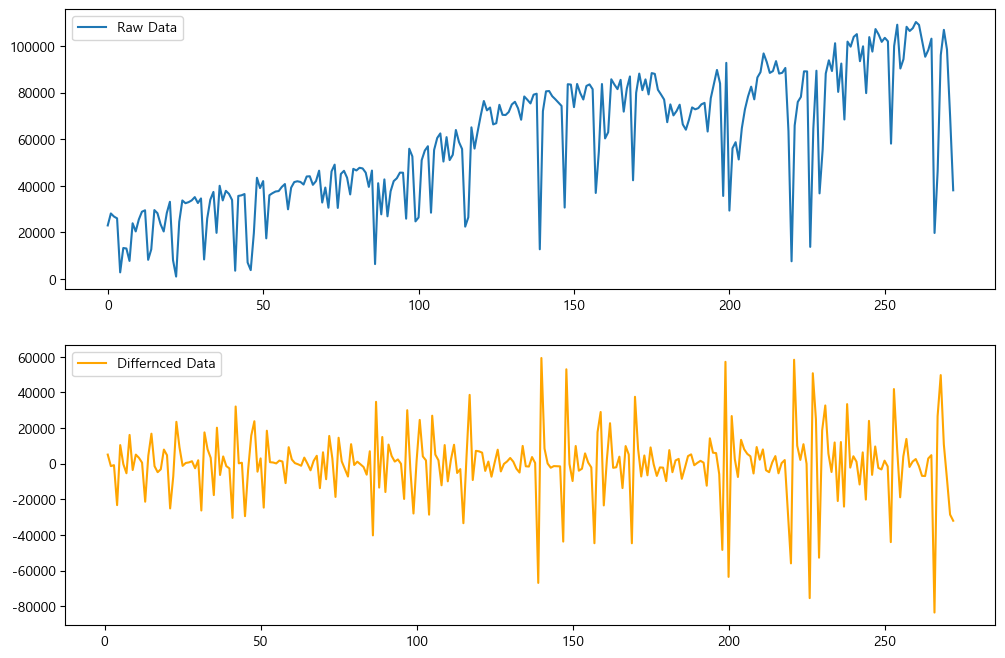

In [17]:
plt.figure( figsize=(12,8) )

plt.subplot(211)
plt.plot(data)
plt.legend(['Raw Data'])

plt.subplot(212)
plt.plot(diff_data, 'orange')
plt.legend(['Differnced Data'])

plt.show()

## 차분 데이터의 정상성 확인

In [18]:
adf_result = adfuller( diff_data,
                       maxlag = 1 )

print( 'ADF 검정통계량 : %.4f'  % adf_result[0] )
print( 'p-value : %.4f'  % adf_result[1] )
print( 'used lag :', adf_result[2] )
print( 'critical values :', adf_result[4] )

ADF 검정통계량 : -18.8137
p-value : 0.0000
used lag : 1
critical values : {'1%': -3.4548039258751206, '5%': -2.872304928618605, '10%': -2.5725063100137175}


## 차분 데이터의 ACF 및 PACF 확인

- Differencing 데이터의 ACF 및 PACF 의 그래프 개형으로 시계열 모형의 Parameter를 예상할 수 있다.

- 그러나 대부분의 실제 시계열 데이터의 경우, 그래프 개형으로 판단하기가 애매한 경우가 많아서 파라미터 범위를 지정하여 반복연산을 돌려 시계열 모형의 p,d,q 값을 산출하는 경우가 많다. 

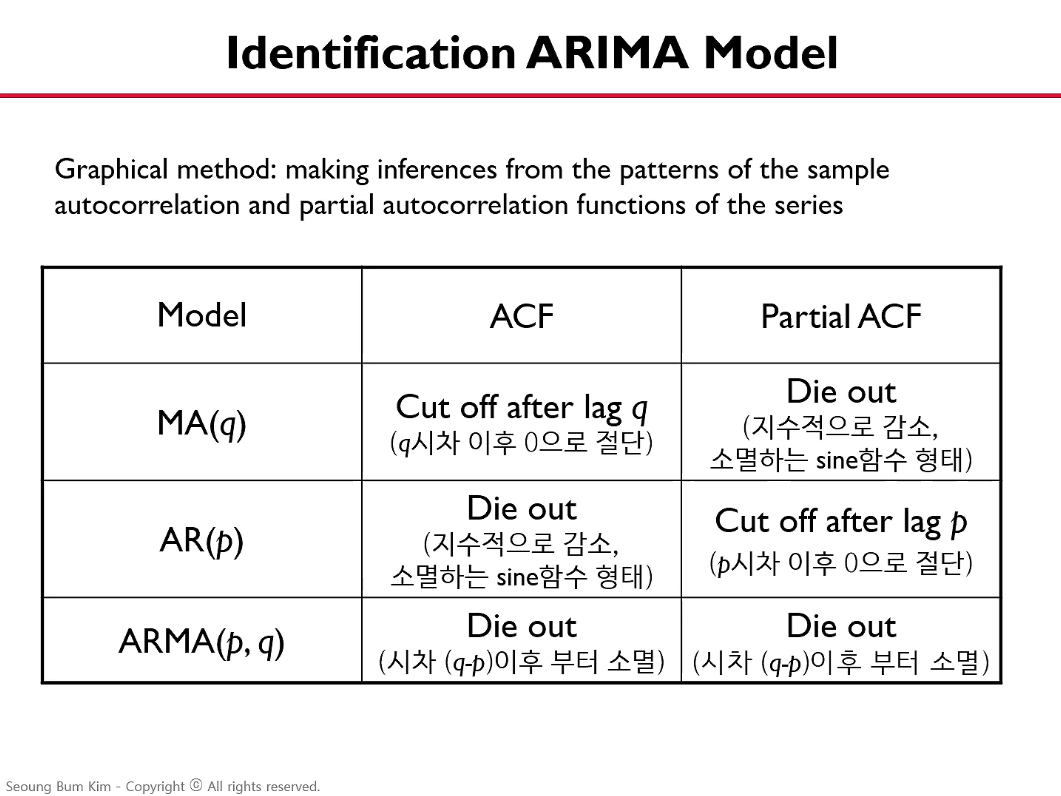

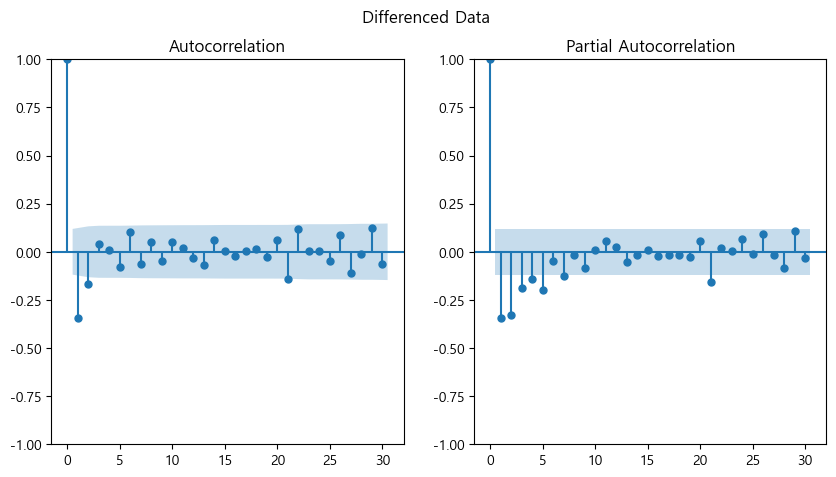

In [19]:
fig, ax = plt.subplots(1,2, figsize = (10,5))
fig.suptitle('Differenced Data')

plot_acf( diff_data.values.squeeze(), lags = 30, ax=ax[0])
plot_pacf( diff_data.values.squeeze(), lags = 30, ax=ax[1]);

# Data Set 분리
- 시계열 데이터의 경우 순서가 뒤섞이면 안되기 때문에 `suffle = False` 옵션 적용

In [20]:
train_data, test_data = train_test_split( data,
                                          test_size = 0.2,
                                          shuffle = False )  # 시계열 데이터이므로 순서가 뒤섞이면 안됨.

# 시계열 분석 - ARIMA

- 모델 생성  
`statsmodels.tsa.arima.model.ARIMA( endog, exog=None, order=(0, 0, 0), seasonal_order=(0, 0, 0, 0), trend=None, enforce_stationarity=True, enforce_invertibility=True, concentrate_scale=False, trend_offset=1, dates=None, freq=None, missing='none', validate_specification=True )`
  - https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima.model.ARIMA.html
  - Parameters :
    - trend = {‘n’,’c’,’t’,’ct’}
  - Methods :
    - `.fit` : 모델 적합 및 매개변수 추정
      - Returns : `ARIMAResults`


- 훈련 데이터 이후를 예측
  - 예측 (Out-of-sample forecasts)
    - `ARIMAResults.forecast( steps=1, **kwargs )`
      - https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima.model.ARIMAResults.forecast.html
  - forecasts and prediction intervals  
    - `ARIMAResults.get_forecast( steps=1, **kwargs )`
      - https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima.model.ARIMAResults.get_forecast.html
      - Returns : `PredictionResults`
        - Method : `.conf_int( alpha = 0.05 )`


- 적합된 모델을 바탕으로 임의의 구간을 예측
  - 예측 (In-sample prediction and out-of-sample forecasting)
    - https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima.model.ARIMAResults.predict.html
    - `ARIMAResults.predict( start=None, end=None, exog=None, typ='linear', dynamic=False )`
  - prediction and prediction intervals
    - `ARIMAResults.get_prediction( start=None, end=None, dynamic=False, index=None, exog=None, extend_model=None, extend_kwargs=None, **kwargs )`
      - https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima.model.ARIMAResults.get_prediction.html
      - Returns : `PredictionResults`
        - Method : `.conf_int( alpha = 0.05 )`

## 최적 파라미터 탐색 : ARIMA

In [21]:
# 최적 파라미터 탐색 : ARIMA

p = range(0,4)
d = range(0,2)
q = range(0,4)

pdq = list(itertools.product(p, d, q))

aic = []

for i in pdq:
    model = ARIMA( train_data, order = (i), trend = 't' )
    fit_model = model.fit()
    print( f'ARIMA: {i} >> AIC : {round(fit_model.aic, 2)}' )   
    aic.append( round(fit_model.aic, 2) )    
print()


# AIC 작은 순서대로 정렬하여 상위 3개 추출
aic_copy = aic.copy()
aic_copy.sort()

optimal_1 = [ (pdq[i], j) for i, j in enumerate(aic) if j == aic_copy[0] ]
optimal_2 = [ (pdq[i], j) for i, j in enumerate(aic) if j == aic_copy[1] ]
optimal_3 = [ (pdq[i], j) for i, j in enumerate(aic) if j == aic_copy[2] ]

print( '< 1st optimal >',
      '\npdq =', optimal_1[0][0],
      '\nminimum AIC =', optimal_1[0][1] )
print()
print( '< 2nd optimal >',
      '\npdq =', optimal_2[0][0],
      '\nminimum AIC =', optimal_2[0][1] )
print()
print( '< 3rd optimal >',
      '\npdq =', optimal_3[0][0],
      '\nminimum AIC =', optimal_3[0][1] )

ARIMA: (0, 0, 0) >> AIC : 5802.7
ARIMA: (0, 0, 1) >> AIC : 4807.98
ARIMA: (0, 0, 2) >> AIC : 4797.98
ARIMA: (0, 0, 3) >> AIC : 4793.36
ARIMA: (0, 1, 0) >> AIC : 5774.14
ARIMA: (0, 1, 1) >> AIC : 4729.79
ARIMA: (0, 1, 2) >> AIC : 4728.55
ARIMA: (0, 1, 3) >> AIC : 4730.44
ARIMA: (1, 0, 0) >> AIC : 4784.89
ARIMA: (1, 0, 1) >> AIC : 4752.06
ARIMA: (1, 0, 2) >> AIC : 4751.95
ARIMA: (1, 0, 3) >> AIC : 4753.62
ARIMA: (1, 1, 0) >> AIC : 4780.5
ARIMA: (1, 1, 1) >> AIC : 4728.7
ARIMA: (1, 1, 2) >> AIC : 4730.16
ARIMA: (1, 1, 3) >> AIC : 4730.7
ARIMA: (2, 0, 0) >> AIC : 4773.75
ARIMA: (2, 0, 1) >> AIC : 4751.9
ARIMA: (2, 0, 2) >> AIC : 4753.49
ARIMA: (2, 0, 3) >> AIC : 4754.33
ARIMA: (2, 1, 0) >> AIC : 4760.84
ARIMA: (2, 1, 1) >> AIC : 4730.65
ARIMA: (2, 1, 2) >> AIC : 4732.39


C:\Users\Boanerges\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA: (2, 1, 3) >> AIC : 4730.65
ARIMA: (3, 0, 0) >> AIC : 4766.54
ARIMA: (3, 0, 1) >> AIC : 4754.3
ARIMA: (3, 0, 2) >> AIC : 4755.94


C:\Users\Boanerges\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA: (3, 0, 3) >> AIC : 4753.97
ARIMA: (3, 1, 0) >> AIC : 4750.38
ARIMA: (3, 1, 1) >> AIC : 4732.34
ARIMA: (3, 1, 2) >> AIC : 4734.3
ARIMA: (3, 1, 3) >> AIC : 4735.83

< 1st optimal > 
pdq = (0, 1, 2) 
minimum AIC = 4728.55

< 2nd optimal > 
pdq = (1, 1, 1) 
minimum AIC = 4728.7

< 3rd optimal > 
pdq = (0, 1, 1) 
minimum AIC = 4729.79


## 모델 생성 및 적합

In [22]:
model = ARIMA( train_data,
               order = (0, 1, 2),
               trend = 't' )
fit_model = model.fit()

print( fit_model.summary() )

                               SARIMAX Results                                
Dep. Variable:      number_of_rentals   No. Observations:                  218
Model:                 ARIMA(0, 1, 2)   Log Likelihood               -2360.274
Date:                Fri, 05 Nov 2021   AIC                           4728.549
Time:                        03:04:37   BIC                           4742.069
Sample:                             0   HQIC                          4734.010
                                - 218                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1           302.1525    115.279      2.621      0.009      76.210     528.095
ma.L1         -0.7586      0.065    -11.684      0.000      -0.886      -0.631
ma.L2         -0.1219      0.059     -2.083      0.0

### 잔차분석

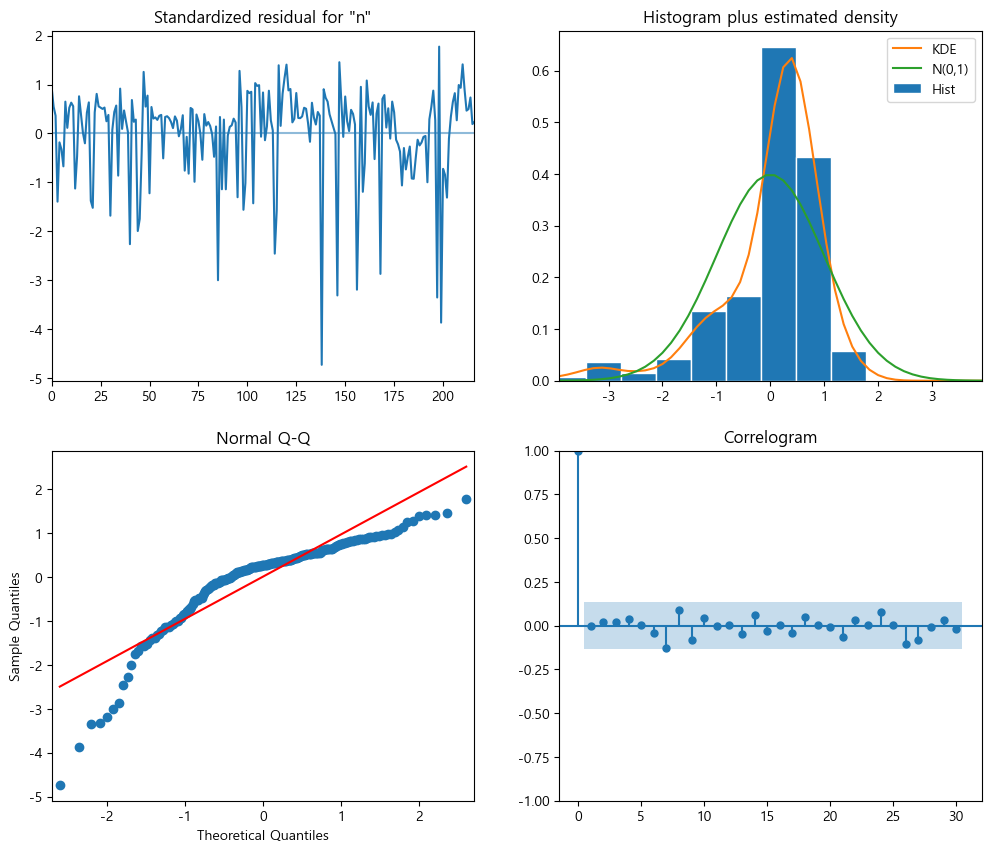

In [23]:
fit_model.plot_diagnostics( figsize =(12,10), lags = 30);

## 예측 및 평가

### 훈련 데이터 이후에 대한 예측

In [24]:
# train data 로부터 얼마 이후까지 예측할 것인지 지정
ahead = test_data.size

# 학습 데이터 이후를 예측한 값
forecast = fit_model.forecast( ahead )

# 예측값의 신뢰구간
forecast_interval = fit_model.get_forecast( steps = ahead ).conf_int(alpha = 0.05)

# 예측값과 신뢰구간에 대한 데이터프레임
forecast_result = pd.concat( [ forecast, forecast_interval ], axis = 1).round(3)
print(forecast_result)
print()


# R-squared
r2 = r2_score( test_data, forecast )

# MSE (Mean Squared Error)
mse = mean_squared_error( test_data, forecast )

# RMSE (Root Mean Squared Error)
rmse = mean_squared_error( test_data, forecast, squared=False)

# MAE (Mean Absolute Error)
mae = mean_absolute_error( test_data, forecast )

print( '< 평가지표 >')
print( 'R-squared: %.4f' % r2 )
print( 'MSE: %.4f' % mse )
print( 'RMSE: %.4f' % rmse )
print( 'MAE: %.4f' % mae )
print()

     predicted_mean  lower number_of_rentals  upper number_of_rentals
218       86153.536                60132.337               112174.735
219       86070.147                59301.346               112838.947
220       86372.299                59423.450               113321.148
221       86674.452                59546.750               113802.153
222       86976.604                59671.221               114281.987
223       87278.757                59796.841               114760.672
224       87580.909                59923.587               115238.231
225       87883.062                60051.439               115714.684
226       88185.214                60180.376               116190.052
227       88487.366                60310.378               116664.355
228       88789.519                60441.425               117137.613
229       89091.671                60573.498               117609.845
230       89393.824                60706.580               118081.068
231       89695.976 

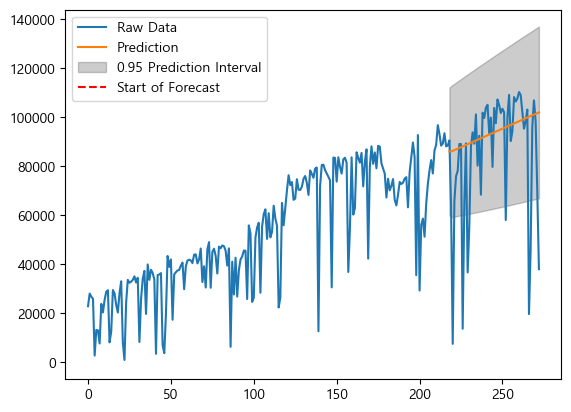

In [25]:
# 그래프 출력
pred_value = forecast_result.iloc[:,0]
pred_lower = forecast_result.iloc[:,1]
pred_upper = forecast_result.iloc[:,2]

plt.plot( data, label = 'Raw Data' )
plt.plot( forecast, label = 'Prediction' )
plt.fill_between( forecast.index, pred_lower, pred_upper,
                  color = 'k', alpha = 0.2,
                  label = '0.95 Prediction Interval' )

plt.vlines( test_data.index[0], 7, 13,
            linestyle = '--', color = 'r',
            label = 'Start of Forecast' )

plt.legend()
plt.show()

### 임의의 구간 예측

In [26]:
a = 35
b = 270

# 예측 구간 설정
start_index = data.index[ a ]
end_index = data.index[ b ]

# 임의의 구간의 데이터에 적합모델을 적용하여 예측한 값
prediction = fit_model.predict( start = start_index,
                                end = end_index )

# 예측값의 신뢰구간
prediction_interval = fit_model.get_prediction( start = start_index,
                                                end = end_index ).conf_int(alpha = 0.05)

# 예측값과 신뢰구간에 대한 데이터프레임
pred_result = pd.concat( [prediction, prediction_interval], axis = 1)
print(pred_result)
print()


# R-squared
r2 = r2_score( data[ a : b+1 ], prediction )

# MSE (Mean Squared Error)
mse = mean_squared_error( data[ a : b+1 ], prediction )

# RMSE (Root Mean Squared Error)
rmse = mean_squared_error( data[ a : b+1 ], prediction, squared=False)

# MAE (Mean Absolute Error)
mae = mean_absolute_error( data[ a : b+1 ], prediction )

print( '< 평가지표 >')
print( 'R-squared: %.4f' % r2 )
print( 'MSE: %.4f' % mse )
print( 'RMSE: %.4f' % rmse )
print( 'MAE: %.4f' % mae )
print()

     predicted_mean  lower number_of_rentals  upper number_of_rentals
35     31245.770899              5223.747495             57267.794304
36     27864.293479              1842.434433             53886.152526
37     32497.317337              6475.589876             58519.044798
38     31616.488582              5594.866472             57638.110692
39     33272.749078              7251.211315             59294.286840
..              ...                      ...                      ...
266   100271.313657             66049.377134            134493.250181
267   100573.466149             66210.510962            134936.421335
268   100875.618640             66372.221142            135379.016137
269   101177.771131             66534.500665            135821.041597
270   101479.923622             66697.342661            136262.504584

[236 rows x 3 columns]

< 평가지표 >
R-squared: 0.5838
MSE: 268088188.1491
RMSE: 16373.3988
MAE: 10434.0365



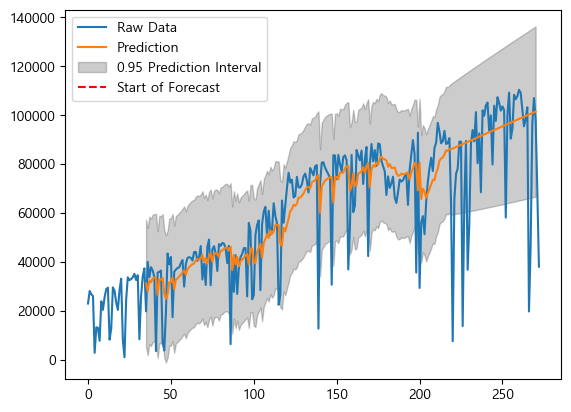

In [27]:
# 그래프 출력
pred_value = pred_result.iloc[:,0]
pred_lower = pred_result.iloc[:,1]
pred_upper = pred_result.iloc[:,2]

plt.plot( data, label = 'Raw Data' )
plt.plot( prediction, label = 'Prediction' )
plt.fill_between( prediction.index, pred_lower, pred_upper,
                  color = 'k', alpha = 0.2,
                  label = '0.95 Prediction Interval' )

plt.vlines( test_data.index[0], 7, 13,
            linestyle = '--', color = 'r',
            label = 'Start of Forecast' )

plt.legend()
plt.show()

# 시계열 분석 - SARIMA

- 모델 생성  
`statsmodels.tsa.statespace.sarimax.SARIMAX( endog, exog=None, order=(1, 0, 0), seasonal_order=(0, 0, 0, 0), trend=None, measurement_error=False, time_varying_regression=False, mle_regression=True, simple_differencing=False, enforce_stationarity=True, enforce_invertibility=True, hamilton_representation=False, concentrate_scale=False, trend_offset=1, use_exact_diffuse=False, dates=None, freq=None, missing='none', validate_specification=True, **kwargs )`  
https://www.statsmodels.org/stable/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html


- 예측 (Out-of-sample forecasts)  
`MLEResults.forecast( steps=1, **kwargs )`  
https://www.statsmodels.org/stable/generated/statsmodels.tsa.statespace.mlemodel.MLEResults.forecast.html

- forecasts and prediction intervals  
`MLEResults.get_forecast( steps=1, **kwargs )`  
Method : `.conf_int( alpha = 0.05 )`  
https://www.statsmodels.org/stable/generated/statsmodels.tsa.statespace.mlemodel.MLEResults.get_forecast.html

- 예측 (In-sample prediction and out-of-sample forecasting)  
`MLEResults.predict( start=None, end=None, dynamic=False, **kwargs )`  
https://www.statsmodels.org/stable/generated/statsmodels.tsa.statespace.mlemodel.MLEResults.predict.html

- prediction and prediction intervals  
`MLEResults.get_prediction( start=None, end=None, dynamic=False, index=None, exog=None, extend_model=None, extend_kwargs=None, **kwargs )`  
Method : `.conf_int( alpha = 0.05 )`  
https://www.statsmodels.org/stable/generated/statsmodels.tsa.statespace.mlemodel.MLEResults.get_prediction.html

## 최적 파라미터 탐색 : SARIMA

In [28]:
# seasonal period 설정
season = 91


# 최적 파라미터 탐색 : SARIMA
p = range(0,3)
d = range(1,2)
q = range(0,3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [ ( x[0], x[1], x[2], season ) for x in list(itertools.product(p, d, q)) ] # 1개월 단위의 계절변동을 보이므로 12 입력

aic = []
params = []

for i in pdq:
    for j in seasonal_pdq:
        try:
            model = SARIMAX( train_data, order = (i), seasonal_order = (j) )
            fit_model = model.fit()
            print( f'SARIMA: {i}{j} >> AIC : {round(fit_model.aic, 2)}' )
            aic.append( round(fit_model.aic, 2) )
            params.append( (i, j) )
        except:
            continue
print()


# AIC 작은 순서대로 정렬하여 상위 3개 추출
aic_copy = aic.copy()
aic_copy.sort()

optimal_1 = [ (params[i], j) for i, j in enumerate(aic) if j == aic_copy[0] ]
optimal_2 = [ (params[i], j) for i, j in enumerate(aic) if j == aic_copy[1] ]
optimal_3 = [ (params[i], j) for i, j in enumerate(aic) if j == aic_copy[2] ]

print( '< 1st optimal >',
      '\npdq =', optimal_1[0][0][0],
      '\nseasonal_pdq =', optimal_1[0][0][1],
      '\nminimum AIC =', optimal_1[0][1] )
print()
print( '< 2nd optimal >',
      '\npdq =', optimal_2[0][0][0],
      '\nseasonal_pdq =', optimal_2[0][0][1],
      '\nminimum AIC =', optimal_2[0][1] )
print()
print( '< 3rd optimal >',
      '\npdq =', optimal_3[0][0][0],
      '\nseasonal_pdq =', optimal_3[0][0][1],
      '\nminimum AIC =', optimal_3[0][1] )

SARIMA: (0, 1, 0)(0, 1, 0, 91) >> AIC : 2903.06
SARIMA: (0, 1, 0)(0, 1, 1, 91) >> AIC : 2868.82
SARIMA: (0, 1, 0)(0, 1, 2, 91) >> AIC : 2862.66
SARIMA: (0, 1, 0)(1, 1, 0, 91) >> AIC : 2845.2
SARIMA: (0, 1, 0)(1, 1, 1, 91) >> AIC : 2856.55
SARIMA: (0, 1, 0)(1, 1, 2, 91) >> AIC : 2858.18
SARIMA: (0, 1, 0)(2, 1, 0, 91) >> AIC : 2856.92
SARIMA: (0, 1, 0)(2, 1, 1, 91) >> AIC : 2858.54
SARIMA: (0, 1, 0)(2, 1, 2, 91) >> AIC : 2860.18
SARIMA: (0, 1, 1)(0, 1, 0, 91) >> AIC : 2848.34
SARIMA: (0, 1, 1)(0, 1, 1, 91) >> AIC : 2823.71
SARIMA: (0, 1, 1)(0, 1, 2, 91) >> AIC : 2819.49
SARIMA: (0, 1, 1)(1, 1, 0, 91) >> AIC : 2803.75
SARIMA: (0, 1, 1)(1, 1, 1, 91) >> AIC : 2815.29
SARIMA: (0, 1, 1)(1, 1, 2, 91) >> AIC : 2817.28
SARIMA: (0, 1, 1)(2, 1, 0, 91) >> AIC : 2815.28
SARIMA: (0, 1, 1)(2, 1, 1, 91) >> AIC : 2817.28
SARIMA: (0, 1, 1)(2, 1, 2, 91) >> AIC : 2819.28
SARIMA: (0, 1, 2)(0, 1, 0, 91) >> AIC : 2846.38
SARIMA: (0, 1, 2)(0, 1, 1, 91) >> AIC : 2821.27
SARIMA: (0, 1, 2)(0, 1, 2, 91) >> AIC : 2

## 모델 생성 및 적합

In [30]:
model = SARIMAX( train_data,
                 order = (0, 1, 1),
                 seasonal_order = (1, 1, 0, 91) )

fit_model = model.fit()

print( fit_model.summary() )

                                      SARIMAX Results                                      
Dep. Variable:                   number_of_rentals   No. Observations:                  218
Model:             SARIMAX(0, 1, 1)x(1, 1, [], 91)   Log Likelihood               -1398.876
Date:                             Fri, 05 Nov 2021   AIC                           2803.752
Time:                                     04:19:56   BIC                           2812.261
Sample:                                          0   HQIC                          2807.209
                                             - 218                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7689      0.050    -15.370      0.000      -0.867      -0.671
ar.S.L91      -0.9998      

### 잔차분석

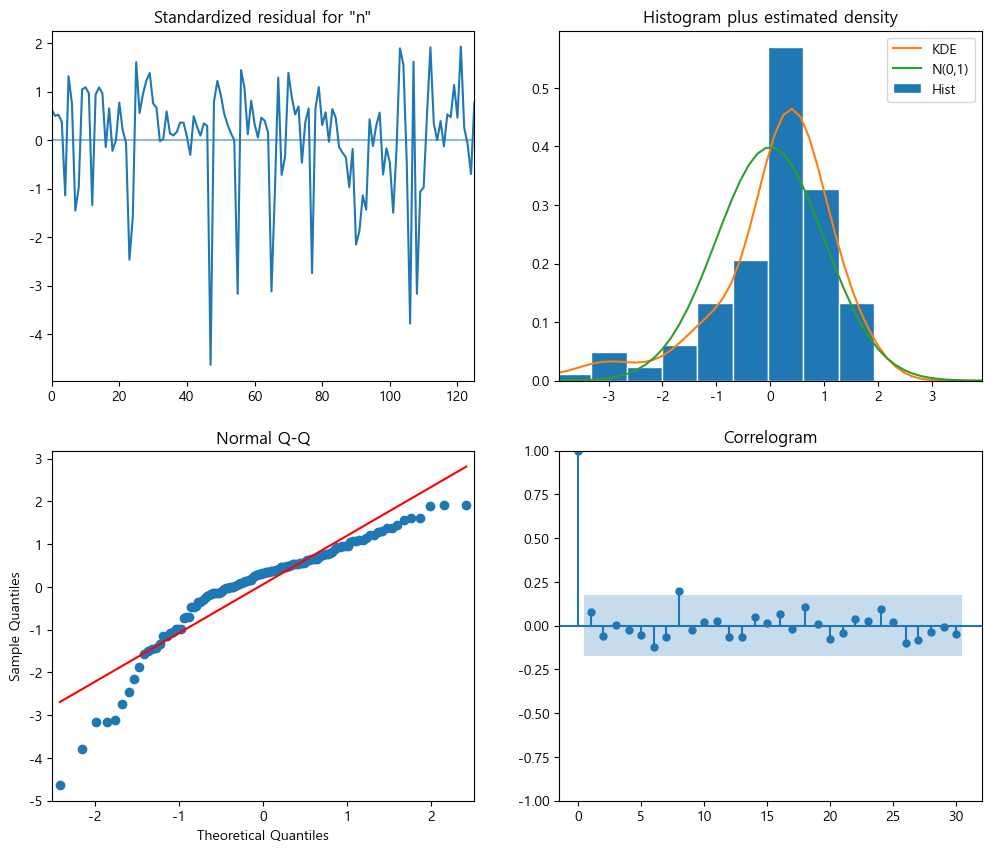

In [31]:
fit_model.plot_diagnostics( figsize =(12,10), lags = 30);

## 예측 및 평가

### 훈련 데이터 이후에 대한 예측

In [32]:
# train data 로부터 얼마 이후까지 예측할 것인지 지정
ahead = test_data.size

# 학습 데이터 이후를 예측한 값
forecast = fit_model.forecast( ahead )

# 예측값의 신뢰구간
forecast_interval = fit_model.get_forecast( steps = ahead ).conf_int(alpha = 0.05)

# 예측값과 신뢰구간에 대한 데이터프레임
forecast_result = pd.concat( [ forecast, forecast_interval ], axis = 1).round(3)
print(forecast_result)
print()


# R-squared
r2 = r2_score( test_data, forecast )

# MSE (Mean Squared Error)
mse = mean_squared_error( test_data, forecast )

# RMSE (Root Mean Squared Error)
rmse = mean_squared_error( test_data, forecast, squared=False)

# MAE (Mean Absolute Error)
mae = mean_absolute_error( test_data, forecast )

print( '< 평가지표 >')
print( 'R-squared: %.4f' % r2 )
print( 'MSE: %.4f' % mse )
print( 'RMSE: %.4f' % rmse )
print( 'MAE: %.4f' % mae )
print()

     predicted_mean  lower number_of_rentals  upper number_of_rentals
218      100652.228                73807.732               127496.723
219       94365.420                66813.175               121917.665
220       98477.876                70235.611               126720.140
221       97176.750                68260.928               126092.573
222       94551.476                64977.432               124125.520
223       64184.772                33966.840                94402.703
224       96294.658                65446.276               127143.040
225       96546.529                65080.326               128012.733
226       97104.150                65032.025               129176.276
227       67705.495                35038.684               100372.306
228       64436.845                31185.983                97687.707
229       80260.887                46436.058               114085.717
230      104085.475                69696.256               138474.695
231       99662.717 

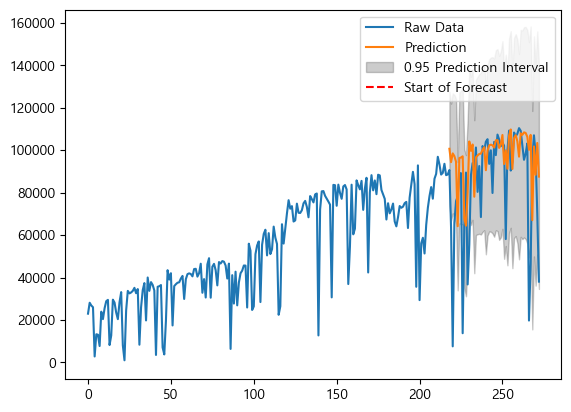

In [33]:
# 그래프 출력

pred_value = forecast_result.iloc[:,0]
pred_lower = forecast_result.iloc[:,1]
pred_upper = forecast_result.iloc[:,2]

plt.plot( data, label = 'Raw Data' )
plt.plot( forecast, label = 'Prediction' )
plt.fill_between( forecast.index, pred_lower, pred_upper,
                  color = 'k', alpha = 0.2,
                  label = '0.95 Prediction Interval' )

plt.vlines( test_data.index[0], 7, 13,
            linestyle = '--', color = 'r',
            label = 'Start of Forecast' )

plt.legend()
plt.show()

### 임의의 구간 예측

In [38]:
a = 100
b = 270

# 예측 구간 설정
start_index = data.index[ a ]
end_index = data.index[ b ]

# 임의의 구간의 데이터에 적합모델을 적용하여 예측한 값
prediction = fit_model.predict( start = start_index,
                                end = end_index )

# 예측값의 신뢰구간
prediction_interval = fit_model.get_prediction( start = start_index,
                                                end = end_index ).conf_int(alpha = 0.05)

# 예측값과 신뢰구간에 대한 데이터프레임
pred_result = pd.concat( [prediction, prediction_interval], axis = 1)
print(pred_result)
print()


# R-squared
r2 = r2_score( data[ a : b+1 ], prediction )

# MSE (Mean Squared Error)
mse = mean_squared_error( data[ a : b+1 ], prediction )

# RMSE (Root Mean Squared Error)
rmse = mean_squared_error( data[ a : b+1 ], prediction, squared=False)

# MAE (Mean Absolute Error)
mae = mean_absolute_error( data[ a : b+1 ], prediction )

print( '< 평가지표 >')
print( 'R-squared: %.4f' % r2 )
print( 'MSE: %.4f' % mse )
print( 'RMSE: %.4f' % rmse )
print( 'MAE: %.4f' % mae )
print()

     predicted_mean  lower number_of_rentals  upper number_of_rentals
100    39913.338747             12874.395366             66952.282129
101    36647.105787              9618.013204             63676.198371
102    40118.627530             13095.198216             67142.056845
103    43739.578060             16719.407927             70759.748192
104    46937.423583             19919.130200             73955.716966
..              ...                      ...                      ...
266   100177.761551             49496.474850            150859.048251
267   107193.349609             56133.657961            158253.041258
268    67025.753944             15590.441164            118461.066725
269   101755.691932             49947.481285            153563.902579
270    88386.841240             36208.397606            140565.284874

[171 rows x 3 columns]

< 평가지표 >
R-squared: 0.0687
MSE: 403273975.1327
RMSE: 20081.6826
MAE: 13066.6914



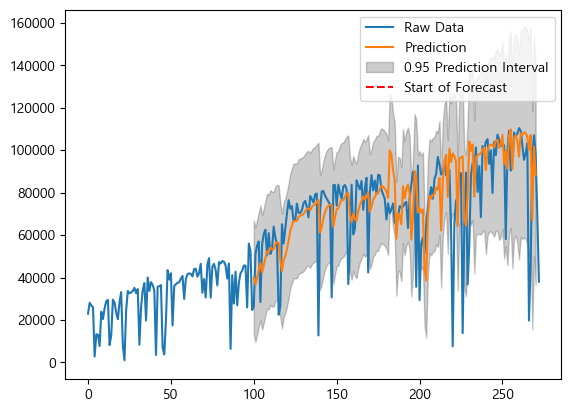

In [39]:
# 그래프 출력
pred_value = pred_result.iloc[:,0]
pred_lower = pred_result.iloc[:,1]
pred_upper = pred_result.iloc[:,2]

plt.plot( data, label = 'Raw Data' )
plt.plot( prediction, label = 'Prediction' )
plt.fill_between( prediction.index, pred_lower, pred_upper,
                  color = 'k', alpha = 0.2,
                  label = '0.95 Prediction Interval' )

plt.vlines( test_data.index[0], 7, 13,
            linestyle = '--', color = 'r',
            label = 'Start of Forecast' )

plt.legend()
plt.show()